# Assignment 4 [code and report]

>Program the quicksort and heapsort algorithm in python.
I believe that you already have the mergesort algorithm written in python.
It is perplexing to me that while all these three algorithms share the same complexity, i.e., O(n lg n).  Most commercial applications prefer quicksort.
Please do the followings:
> 1. Compare the actual time run for these three algorithms (compare using varying size of n)
> 2. Time the number of comparisons and exchanges of each algorithm (see slide 34 in the lecture slide for example).   
> 3.  Plot 2 and 3 (make a table if you like)

**note: I don't know what professor meant by "Plot 2 and 3"**

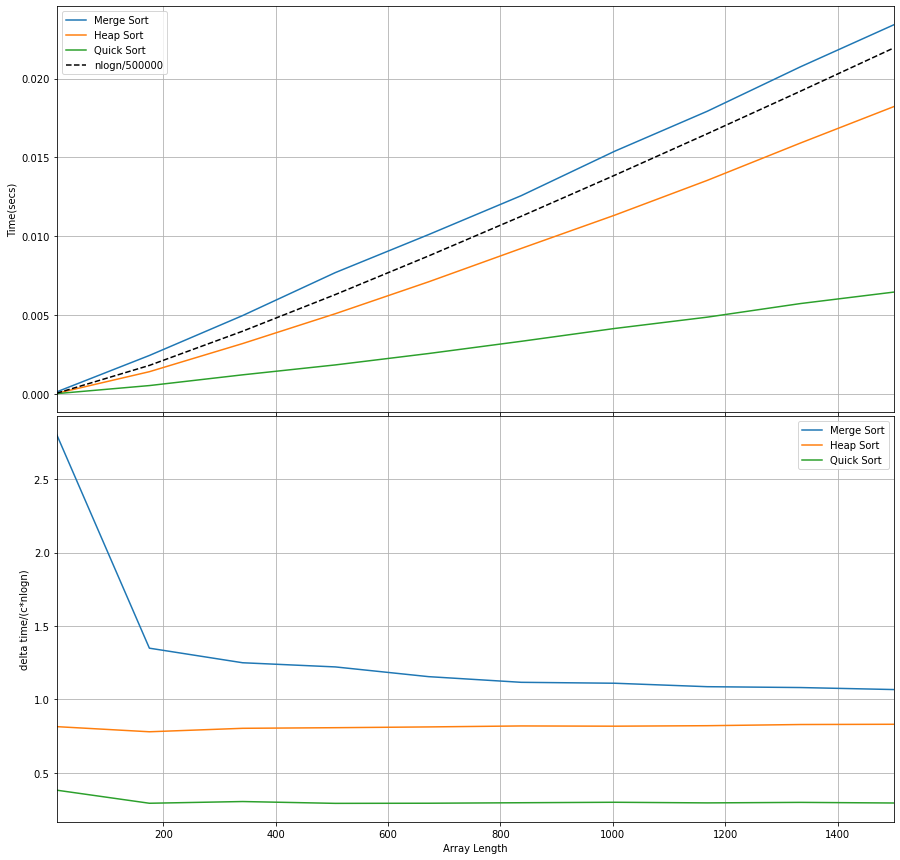

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

class MergeSortClass:
    def sort(self,A):
        return self.MergeSort(A,0,A.size-1)

    def Merge(self,A,p,q,r):
        L = A[p:q]
        R = A[q:r+1]
        L = np.append(L,np.inf)
        R = np.append(R,np.inf)
        i = 0
        j = 0
        for k in range(p,r+1):
            if(L[i] <= R[j]):
                A[k] = L[i]
                i += 1
            elif(R[j] <= L[i]):
                A[k] = R[j]
                j += 1
            else:
                pass
        return A
    def MergeSort(self,A,p,r):
        if p<r:
            q = int((p+r)/2)
            A = self.MergeSort(A,p,q)
            A = self.MergeSort(A,q+1,r)
            A = self.Merge(A,p,q+1,r)
        return A

class HeapSortClass:
    def __init__(self):
        self.heap_size = 0

    def Parent(self,i):
        return int((i+1)/2)-1

    def Left(self,i):
        return 2*(i+1)-1

    def Right(self,i):
        return 2*(i+1)

    def MaxHeapify(self,A,i):
        l = self.Left(i)
        r = self.Right(i)
        if (l <= self.heap_size-1) and (A[l] > A[i]):
            largest = l
        else: 
            largest = i
        if (r <= self.heap_size-1) and (A[r] > A[largest]):
            largest = r
        if largest != i:
            A[i],A[largest] = A[largest],A[i]
            self.MaxHeapify(A,largest)
        return A

    def BuildMaxHeap(self,A):
        self.heap_size = A.size
        for i in range(self.Parent(A.size-1),-1,-1):
            self.MaxHeapify(A,i)
        return A

    def HeapSort(self,A):
        self.BuildMaxHeap(A)
        for i in range(A.size-1,0,-1):
            A[0],A[i] = A[i],A[0]
            self.heap_size = self.heap_size-1
            self.MaxHeapify(A,0)
        return A
    
    def sort(self,A):
        return self.HeapSort(A)

    def PrintHeap(self, A):
        height = int(np.log(A.size)/np.log(2))
        i = 0
        for h in range(0,height+1):
            for a in range(2**h):
                if(i == A.size):
                    print()
                    print()
                    return
                for k in range(int(2**height/(2**h))-1):
                    print("__",end="")
                print(f"{A[i]}_",end="")
                for k in range(int(2**height/(2**h))):
                    print("__",end="")
                i += 1
            print()

class QuickSortClass:
    def QuickSort(self,A,p,r):
        if p<r:
            q = self.Partition(A,p,r)
            self.QuickSort(A,p,q-1)
            self.QuickSort(A,q+1,r)
        return A

    def Partition(self,A,p,r):
        x = A[r]
        i = p-1
        for j in range(p,r):
            if A[j] <= x:
                i += 1
                A[i],A[j] = A[j],A[i]
        A[i+1],A[r] = A[r],A[i+1]
        return i+1

    def sort(self,A):
        return self.QuickSort(A,0,A.size-1)

import sys
sys.setrecursionlimit(1500)

n = np.linspace(10,1500,10,dtype=int)
nlogn = n*np.log(n)/500000

algorithms = {'ms':MergeSortClass(),'hs':HeapSortClass(),'qs':QuickSortClass()}
delta_time = {'ms':np.zeros(n.size),'hs':np.zeros(n.size),'qs':np.zeros(n.size)}

for a in range(100):
    for i,num in enumerate(n):
        A = np.random.randint(num,size=num)
        for key in algorithms.keys():
            t0 = time.perf_counter()
            algorithms[key].sort(A.copy())
            t1 = time.perf_counter()
            delta_time[key][i] += (t1-t0)/100
            #print(key,num,delta_time[key][i])

fig,ax = plt.subplots(2,1,sharex=True,figsize=(15,15))

ax[0].plot(n,delta_time['ms'],label='Merge Sort')
ax[0].plot(n,delta_time['hs'],label="Heap Sort")
ax[0].plot(n,delta_time['qs'],label='Quick Sort')
ax[0].plot(n,nlogn,'k--',label='nlogn/500000')
ax[0].set_ylabel("Time(secs)")
ax[0].set_xlim([10,1500])
ax[0].grid(True)
ax[0].legend()

ax[1].plot(n,delta_time['ms']/nlogn,label="Merge Sort")
ax[1].plot(n,delta_time['hs']/nlogn,label="Heap Sort")
ax[1].plot(n,delta_time['qs']/nlogn,label="Quick Sort")
ax[1].set_ylabel("delta time/(c*nlogn)")
ax[1].set_xlabel("Array Length")
ax[1].grid(True)
ax[1].legend()

fig.subplots_adjust(hspace=0.01)

plt.show()

The graph on top shows the time spent for each of the sorting algorithms at different array lengths. The sorting for each array length was repeated 100 times to get the average time spent. The graph on the bottom shows the time spent divided by c\*nlogn where c = 1/500000. This is to show that asymtpotically, all the algorithms are just nlogn that is scaled differently. It could be seen that the constant *c* for Merge sort is the largest therefore making it the slowest algorithm of the three, quick sort is on average the fastest sorting algorithm of the three. And heap sort was slightly faster than merge sort. It could be seen that quick sort is on average approximately 4-5 times faster than the two other algorithms.